## Data Fundamentals (H)
# Week 3: Scientific visualisation
## Supplement: higher dimensional plots
------
 ##### DF(H) - University of Glasgow - John H. Williamson - 2017

LaTeX commands

$$\newcommand{\vec}[1]{{\bf #1}} 
\newcommand{\real}{\mathbb{R}}
\DeclareMathOperator*{\argmin}{arg\,min}
\vec{x}
\real
$$

In [1]:
import numpy as np

# these import matplotlib, and make it draw figures directly in the notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

## Summary
This supplement covers:
* how to plot 2D functions using images, contours, quiverplots and surfaces
* the basic elements of 3D visualisation, including the limitations of 3D display 
* the use of mosaic plots for >3D visualisation

# Higher dimensional plots
Plotting the relationship between more than two variables is difficult. Even for 3D, which at least is familiar from the physical world is troublesome. Humans have a hard time perceiving relationships in 3D accurately, and problems like occlusion become a serious issue. And above three dimensions, there are no direct ways to visualise data; instead the data must be represented by some 2D or 3D display. 

## 2D surfaces
A function $$z=f(x,y)$$ can be considered "2.5D" data. It is not truly 3D, in the sense that no point can be behind another, but it maps each point on a 2D plane to a real number. This can be visualised as a **surface plot**, **contour plot** or **heatmap**.

If this function is **sampled** at regular intervals, forming a rectangular grid of points, then the data can be represented as a 2D array, where each entry is mapped to a height.

In [2]:

import image_audio

# image data
castle = image_audio.load_image_gray("imgs/castle.png")

# topographic data
foula = np.loadtxt("data/foula.txt")

# mathematical functions
span = np.linspace(-3,3,100)
x, y = np.meshgrid(span,span)

mz = (3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) 
   - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2)
   - 1/3.0*np.exp(-(x+1)**2 - y**2)) + 0.5*(2*x+y)




### Image plots
2D arrays can be plotted as **images**. Each element of the array becomes a coloured rectangle. Just like in configuring scatter plot geoms, a **colour map** is used to map scalar values onto colours. The same principles for choice of colour maps apply.

`imshow` shows a 2D array as an image.

Text(0.5, 1.0, '2D mathematical function')

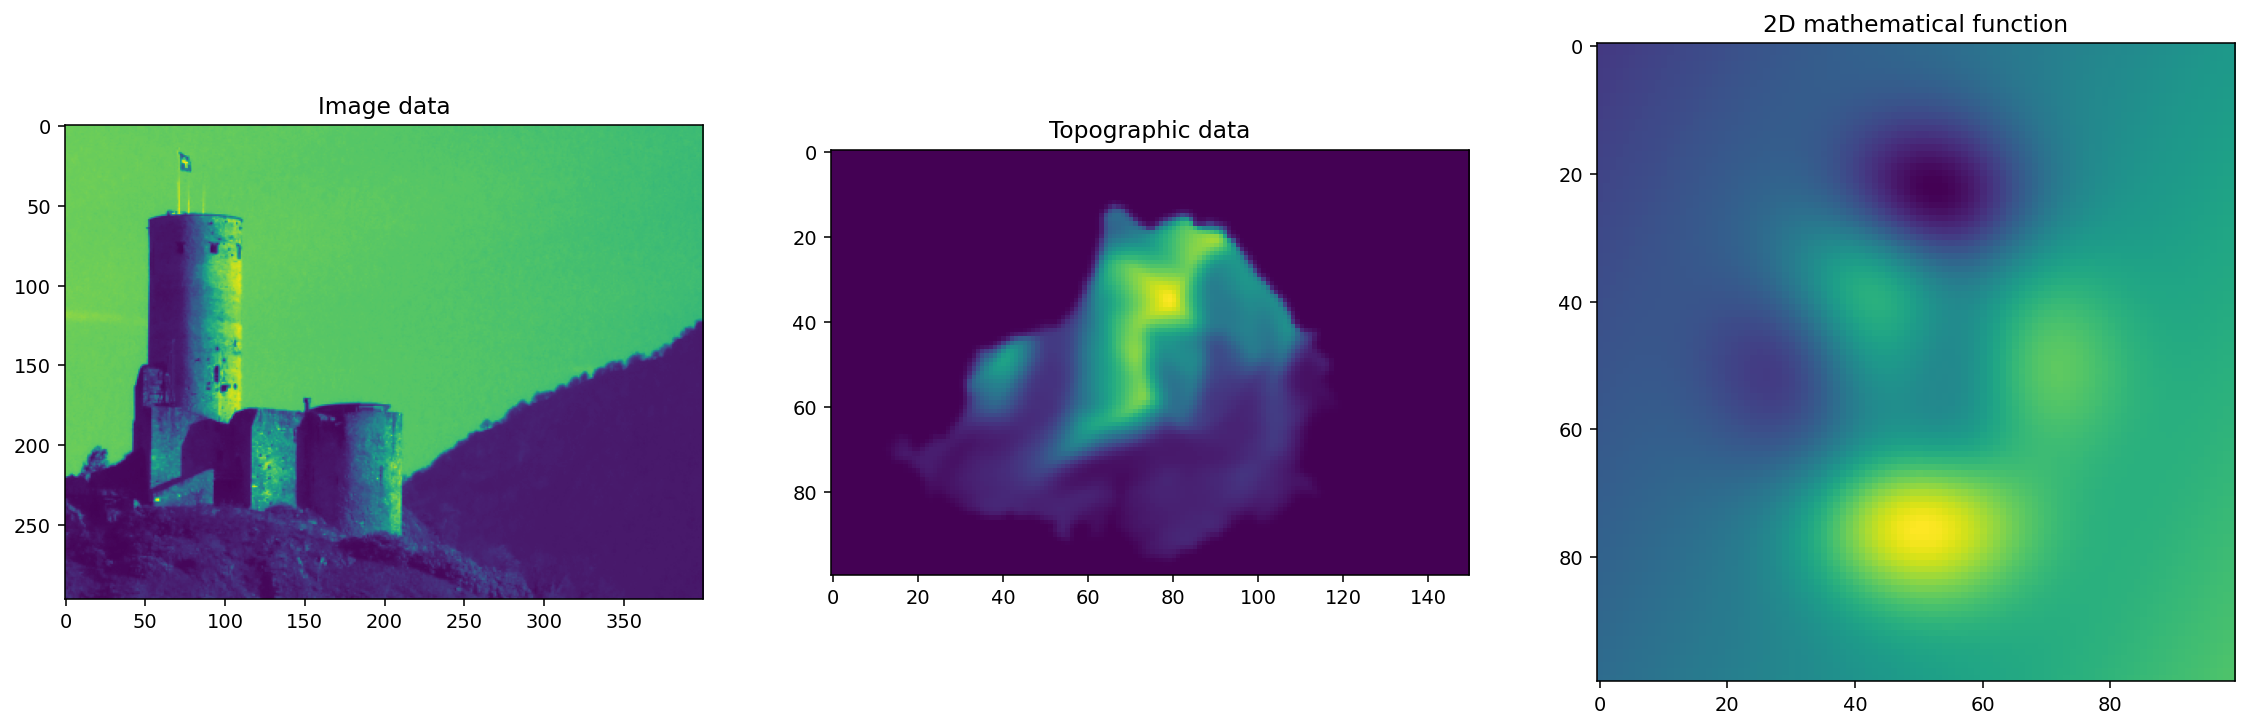

In [3]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(castle)
ax1.set_title("Image data")
ax2.imshow(foula)
ax2.set_title("Topographic data")
ax3.imshow(mz)
ax3.set_title("2D mathematical function")

Choosing the right colour map depends on the context. Images from real cameras should be rendered in grayscale; most other arrays should be visualised using a perceptually linear colour map like `viridis` or `magma`.

Text(0.5, 1.0, 'Terrible')

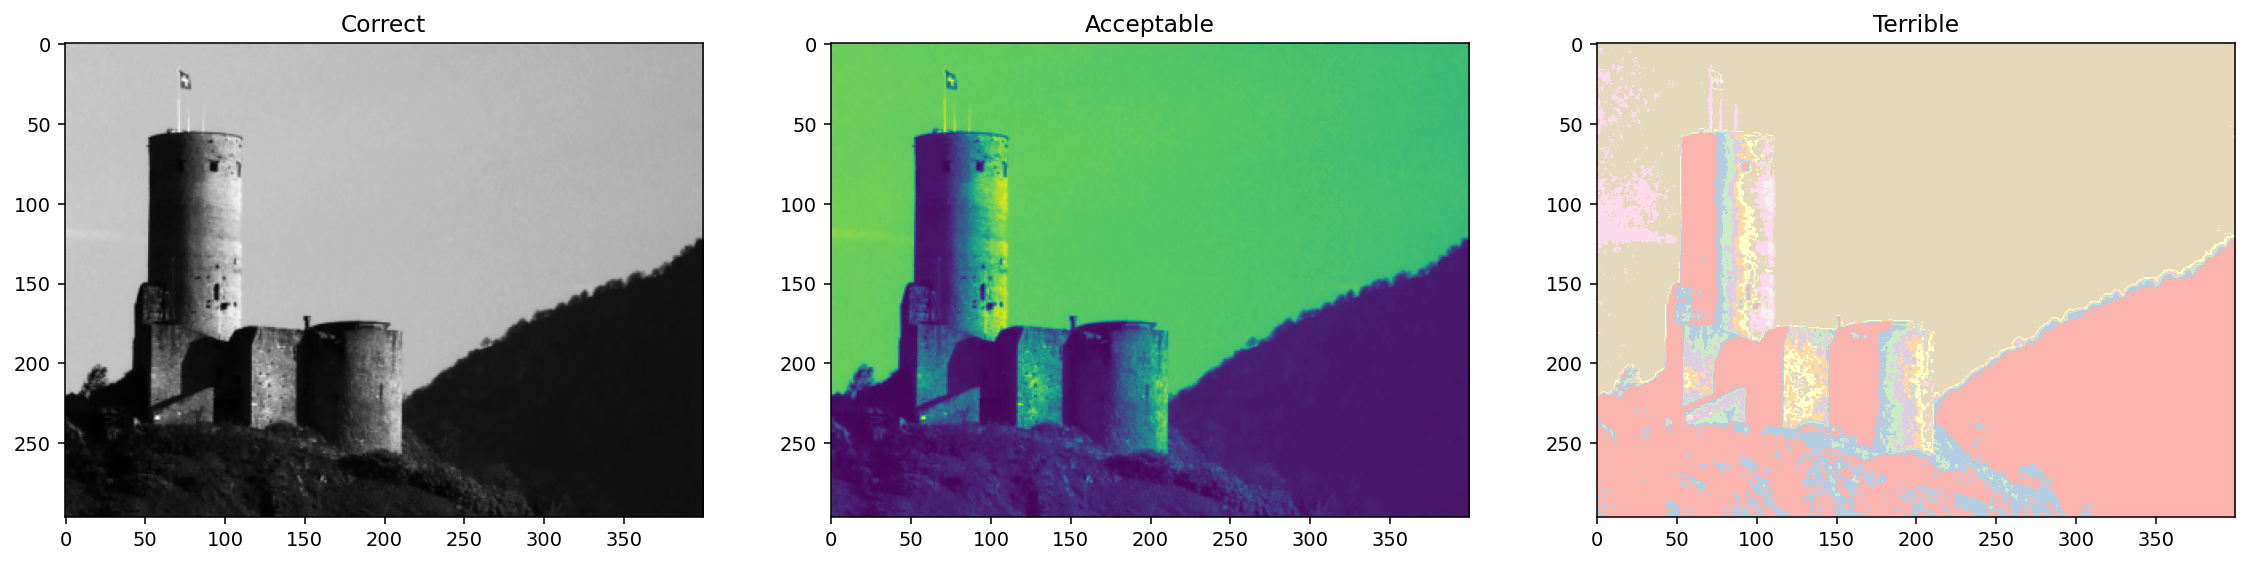

In [4]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
ax.imshow(castle, cmap="gray")
ax.set_title("Correct")
ax = fig.add_subplot(1,3,2)
ax.imshow(castle, cmap="viridis")
ax.set_title("Acceptable")
ax = fig.add_subplot(1,3,3)
ax.imshow(castle, cmap="Pastel1")
ax.set_title("Terrible")

Text(0.5, 1.0, 'Terrible')

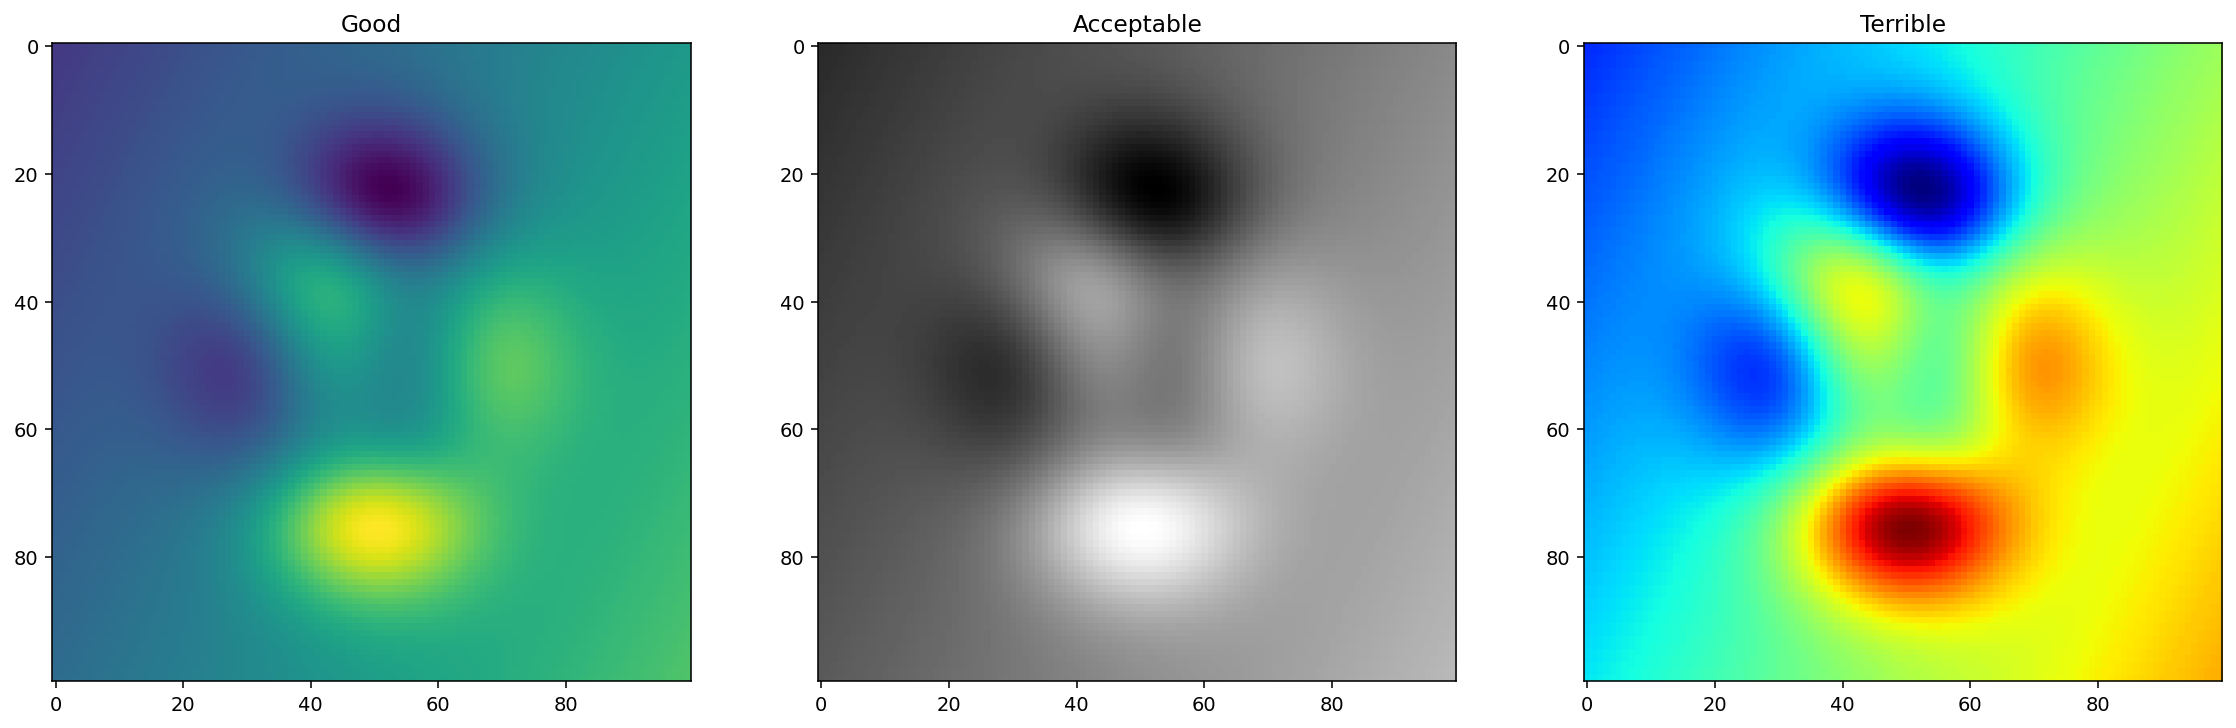

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
ax.imshow(mz, cmap="viridis")
ax.set_title("Good")
ax = fig.add_subplot(1,3,2)
ax.imshow(mz, cmap="gray")
ax.set_title("Acceptable")
ax = fig.add_subplot(1,3,3)
ax.imshow(mz, cmap="jet")
ax.set_title("Terrible")

### Contour plots
An alternative way of visualising surfaces is to render *isocontours* of the surface. This a use of *line geoms* to represent surface height. Isocontours are connected lines of the same value (lines of equal "height"). These are familiar from map rendering, where they are used to show topographic features. Close bunching of contours indicates steep regions of the surface (a hard climb!). Widely spaced contours indicate slow rate of change.



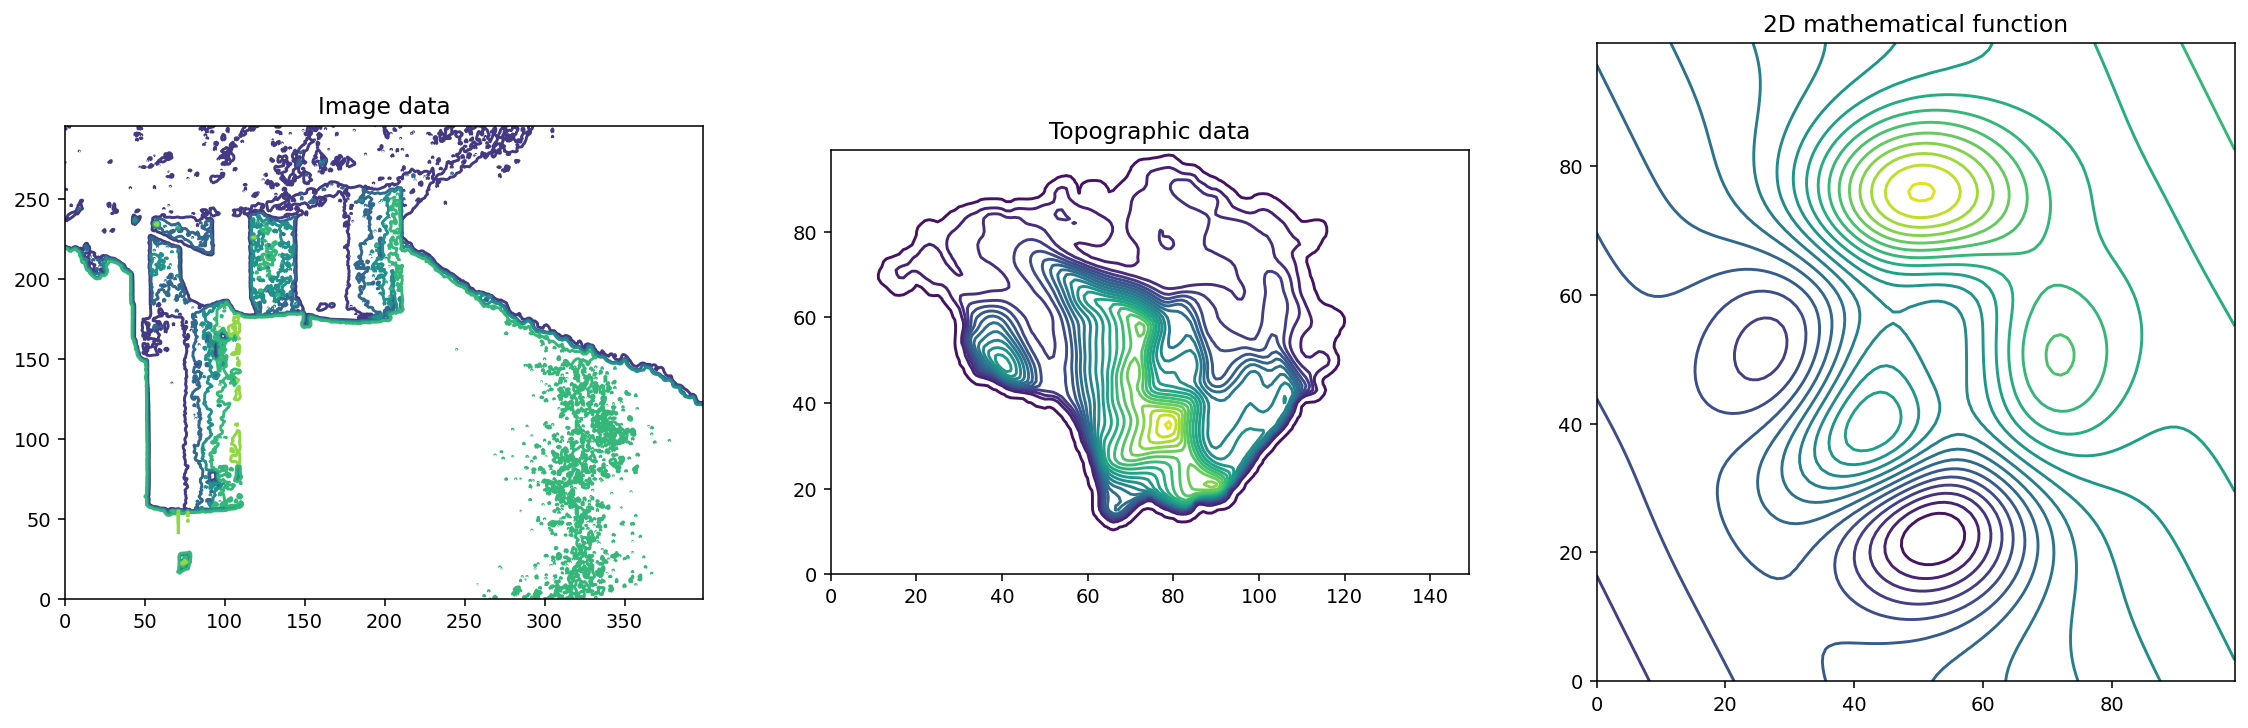

In [6]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.contour(castle, 5)
ax1.set_title("Image data")
ax1.set_aspect(1.0) # must force the aspect here
ax2.contour(foula, 20)
ax2.set_title("Topographic data")
ax2.set_aspect(1.0) # must force the aspect here
ax3.contour(mz, 20)
ax3.set_title("2D mathematical function")
ax3.set_aspect(1.0) # must force the aspect here

The number of contour lines drawn can be configured to show more or less detail. The contours can be coloured according to a colour map or can be fixed to a set colour; and the contours can also be filled or left empty (as above).


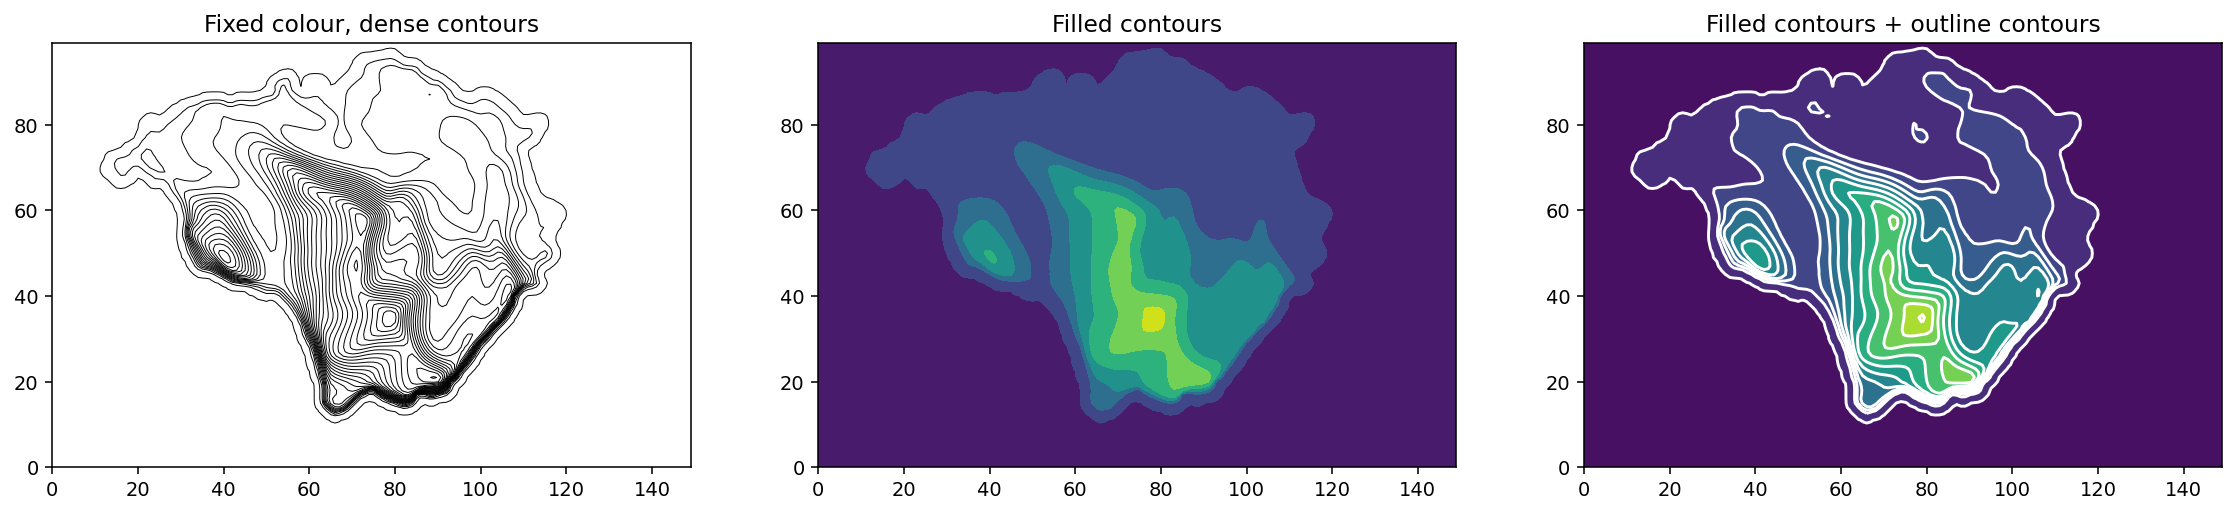

In [7]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.contour(foula, 30, colors='k', linewidths=0.5)
ax1.set_title("Fixed colour, dense contours")
ax1.set_aspect(1.0)

ax2.contourf(foula, 5)
ax2.set_title("Filled contours")
ax2.set_aspect(1.0)

ax3.contourf(foula, 12)
ax3.contour(foula, 12, colors='w')
ax3.set_title("Filled contours + outline contours")
ax3.set_aspect(1.0)



### Surface plots

<IPython.core.display.Javascript object>


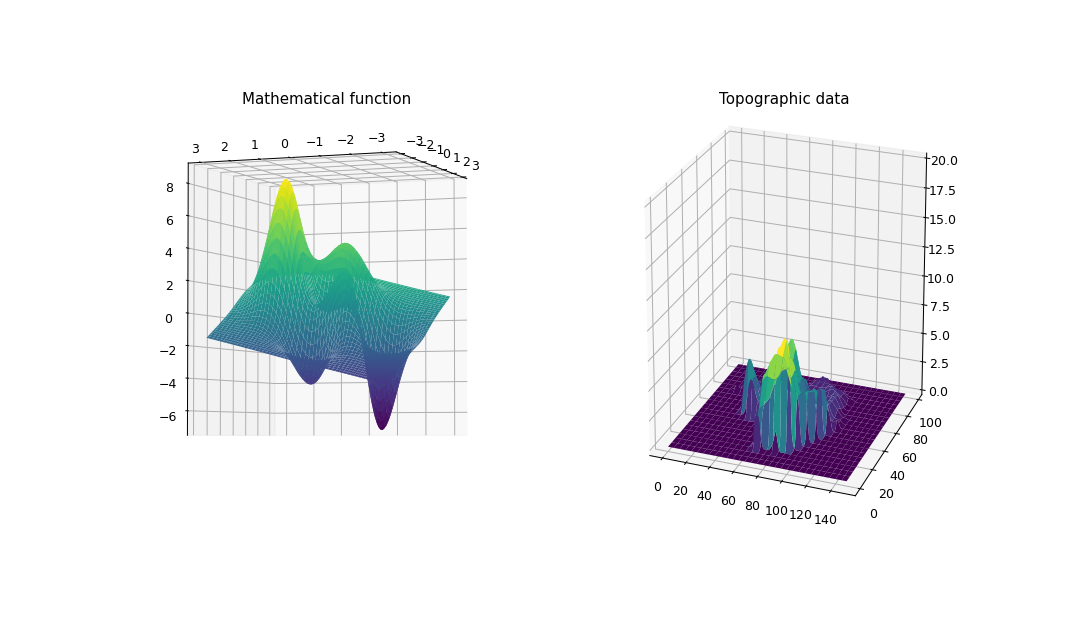

Text(0.5, 0.92, 'Topographic data')

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x,y,mz,cmap='viridis')
ax.set_title("Mathematical function")
ax = fig.add_subplot(1,2,2, projection='3d')
mx, my = np.meshgrid(np.arange((foula.shape[1])), np.arange((foula.shape[0])))
ax.plot_surface(mx,my,foula,cmap='viridis', rstride=5, cstride=5)
ax.set_zlim3d(0,20)
ax.set_title("Topographic data")

<IPython.core.display.Javascript object>


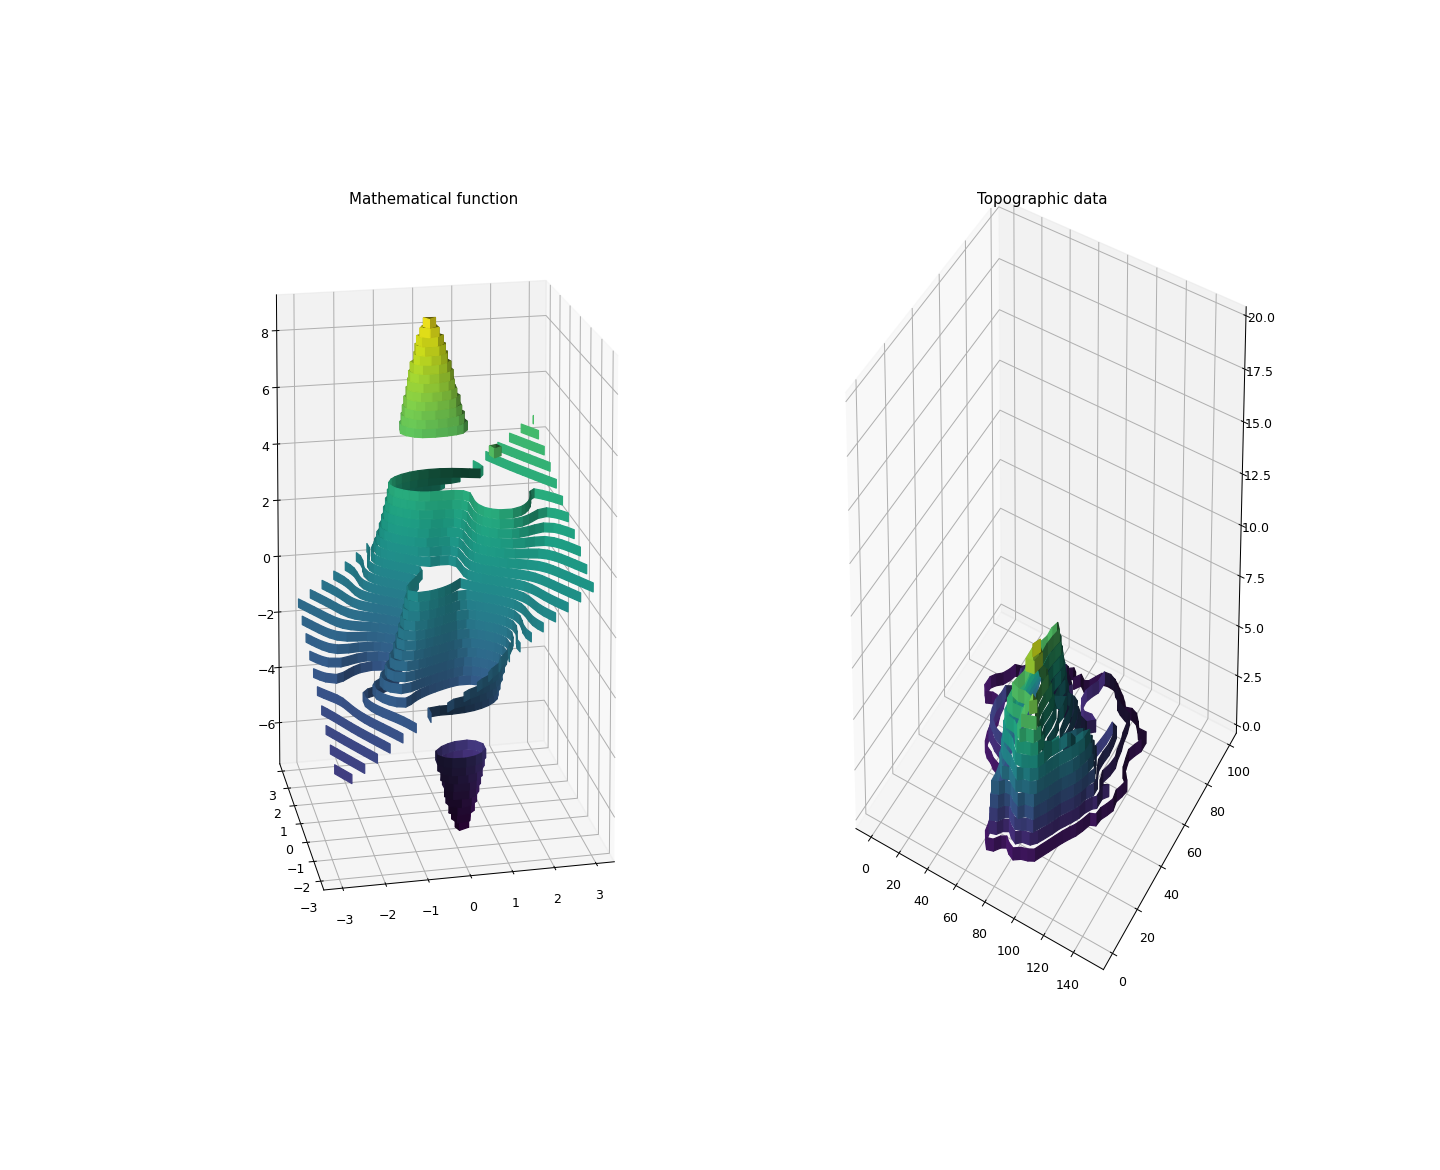

Text(0.5, 0.92, 'Topographic data')

In [10]:
fig = plt.figure(figsize=(16,13))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.contour(x,y,mz,55, cmap='viridis', extend3d=True)
ax.set_title("Mathematical function")

ax = fig.add_subplot(1,2,2, projection='3d')
mx, my = np.meshgrid(np.arange((foula.shape[1])), np.arange((foula.shape[0])))
ax.contour(mx,my,foula,15, cmap='viridis', extend3d=True)
ax.set_zlim3d(0,20)

ax.set_title("Topographic data")

### 3D plots
We can also consider plots of triplets of 1D arrays, $\vec{x}, \vec{y}, \vec{z}$. We saw visualisations of this type using marker colour and scale to communicate the $\vec{z}$ element. 3D projection can also be used to represent three paired 1D vectors. 

This is a **coord**, which has 3 axes, associated with a **projection** which maps every $(x,y,z)$ point in the coordinate system to a point on the 2D plane. Projections can come in many forms, including perspective projection and orthographic projection.

However, projection has several downsides:
* **Occlusion** causes objects to be hidden behind other objects.
* **Distance perception** may be inaccurate (for example, perspective projection *looks* nice, but can seriously distort distances)
* The spatial relationships displayed depends on the view angle rendered. If this is chosen poorly, or not understood clearly by the reader, data relationships can be obscured.

While there are various ways of adding **cues** to 3D plots to enhance perception (simulated lighting, fog/depth colour effects, shadows), the results can still be confusing and hard to interpret. These issues are mitigated somewhat if there is a way to *interactively* change the viewpoint of a 3D plot (and potentially the lighting of a plot).

### Point geoms in 3D
We can plot the earthquake data from earlier in 3D. This makes some sense -- the data really represent 3D positions in space, given by a latitude, longitude and a depth. However, the result is hard to perceive.

<IPython.core.display.Javascript object>


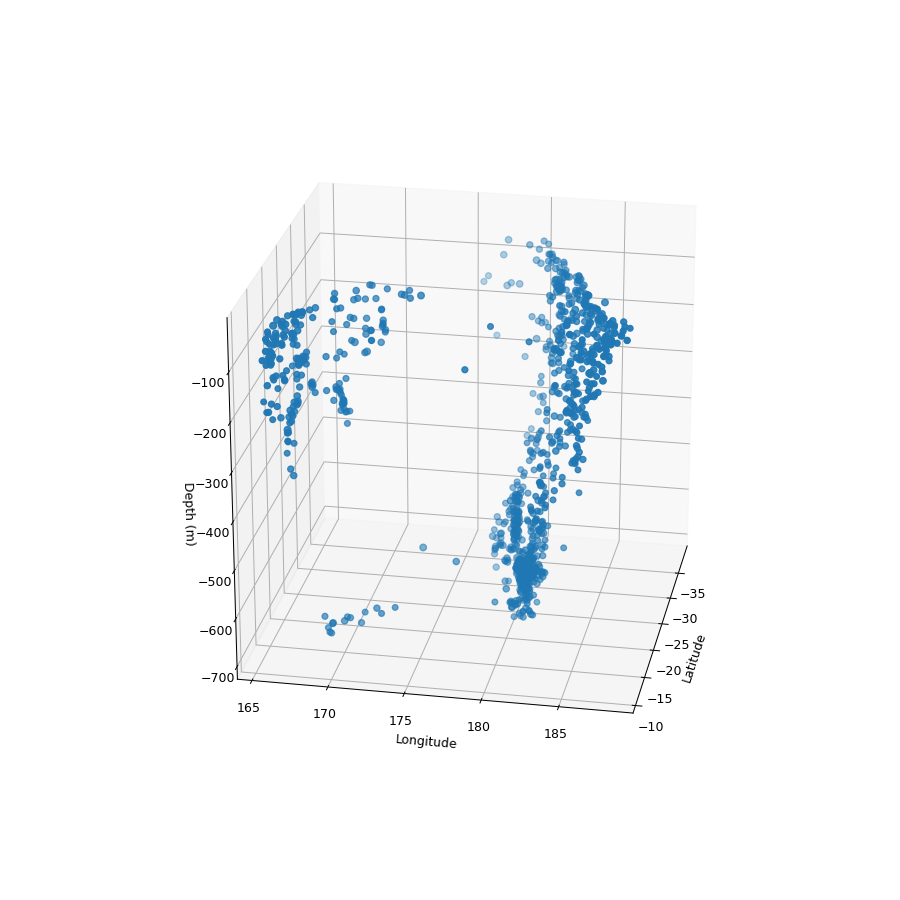

Text(0.5, 0, 'Depth (m)')

In [11]:
# earthquake data

quakes = np.loadtxt("data/quakes.txt")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(quakes[:,0], quakes[:,1], -quakes[:,2], s=quakes[:,3]*5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Depth (m)")

We can try and improve things by showing the surface location of each earthquake, along with its 3D position -- this doesn't help much!

<IPython.core.display.Javascript object>


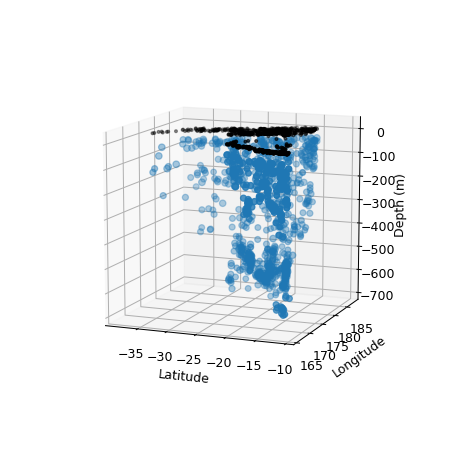

Text(0.5, 0, 'Depth (m)')

In [12]:
quakes = np.loadtxt("data/quakes.txt")
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(quakes[:,0], quakes[:,1], -quakes[:,2], s=quakes[:,3]*5)
# add "shadows" of the points on the surface
ax.scatter(quakes[:,0], quakes[:,1], 0, s=5, c='k')
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Depth (m)")

## Pairwise plots for higher dimensional data
A general approach to datasets with multiple attributes (i.e. multiple columns or 1D arrays of data) is to plot every *pair* of variables in a **mosaic** of **pair plots**. This shows all possible pairwise relationships in a compact form; every column against every column. For $d$ variables, this will result in a grid of $d\times d$ 2D plots. The $i,j$th plot will plot variable $i$ against variable $j$.

Since the "diagonal" of this set of pair plots will be a plot of a variable against itself (which isn't very interesting), the typical choice is to display the histogram of the variable in that position.


The plot below shows measurements of the petal/sepal length of different species of iris flowers. There are four measurements and three species. Each pair of measurements is plotted, and every point is coloured by the species.

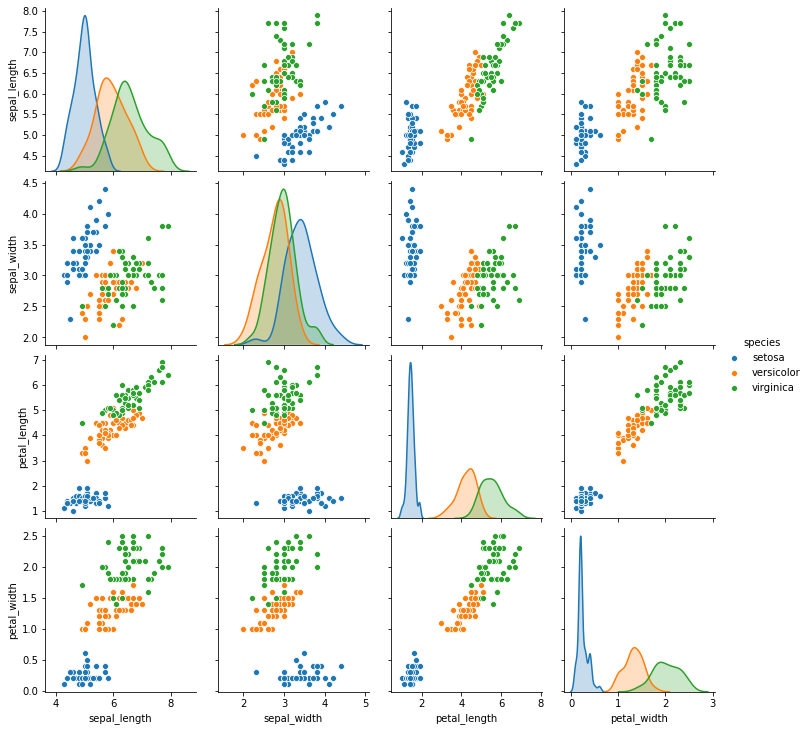

In [14]:
# we'll use seaborn to demo this style of plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

### Caveats with pairwise mosaics
This only really works for $d<4$, as the number of plots becomes overwhelming for large $d$. It also can only reveal pairwise relationships. There are relationships which are very strong but not visible at all in their pairwise relationships.

<IPython.core.display.Javascript object>


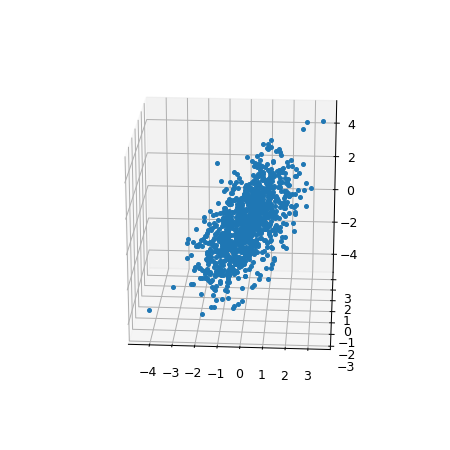

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection='3d')

x = np.random.normal(0,1,(1000,))
y = np.random.normal(0,1,(1000,))
s = x+y

ax.plot(x,y,s, '.')
# ax.axis("equal")

<Figure size 432x288 with 0 Axes>

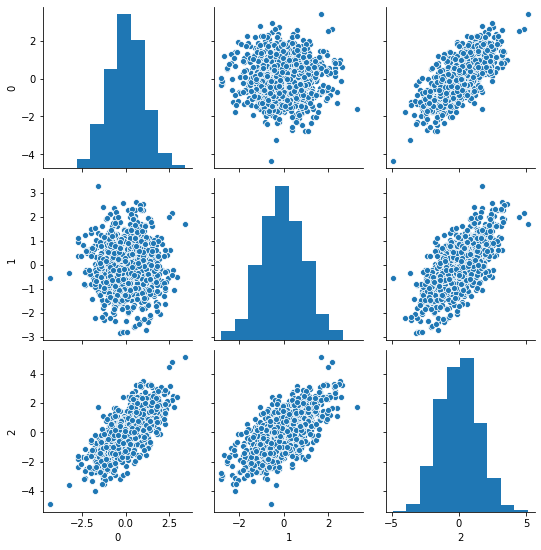

In [17]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
matrix = np.stack([x,y,s]).T
import pandas as pd
g = sns.pairplot(pd.DataFrame(matrix))

## 2D vector fields
A 2D vector valued function $$[u,v] = f(x,y)$$ is often encountered in physical systems and simulations. This is a **vector field** -- a function which evaluates to a vector at any point. We can, for example, visualise this as two separate 2.5D plots (e.g. a faceted plot, with two images or two contour plots). However, this can obscure relationships which are important.

Vector fields often occurs in systems with *flow*, like the airflow around the airfoil of an aircraft wing, or the movement of charged particles in a fluid around a conductor, or the movement of people across a city square. In these cases, $u$ and $v$ represent vectors in the same "space" as $x$ and $y$ (e.g. a force varying across position -- although the scales are different, the spatial directions are the same).

It is very hard to see this from a faceted image plot:

Text(0.5, 1.0, 'V')

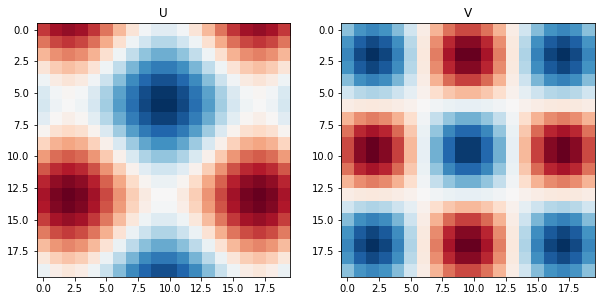

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# a simple test function, which looks very simple when visualised separately
mx, my = np.meshgrid(np.linspace(-4,4,20), np.linspace(-4,4,20))
u = np.cos(mx)-np.sin(my)
v = np.cos(mx)*np.cos(my)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(u, cmap='RdBu')
ax.set_title("U")
ax = fig.add_subplot(1,2,2)
ax.imshow(v, cmap='RdBu')
ax.set_title("V")

### Quiver plots
These fields can be visualised more coherently as a **quiver plot**, which just draws an arrow representing the vector on a regular grid across the domain of the function. 

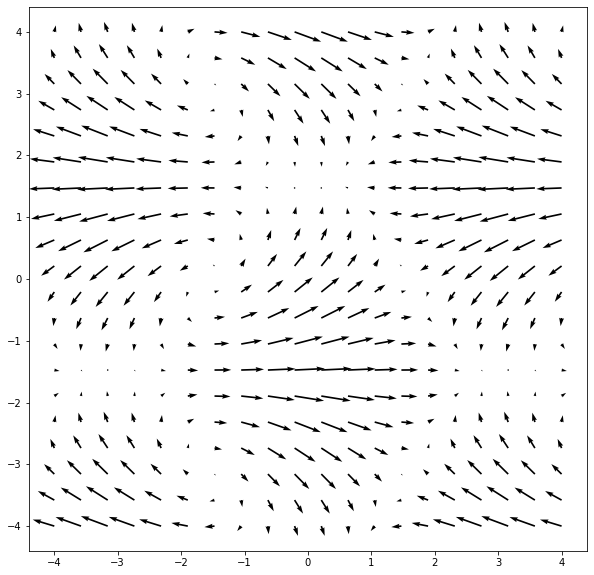

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.quiver(mx,my,u,v)

#### Streamline plots
An alternative is the **streamline plot** which shows the paths that a particle would take if it were moved along by the vector field. This can be significantly easier to understand, but depends heavily on the paths chosen to be rendered.


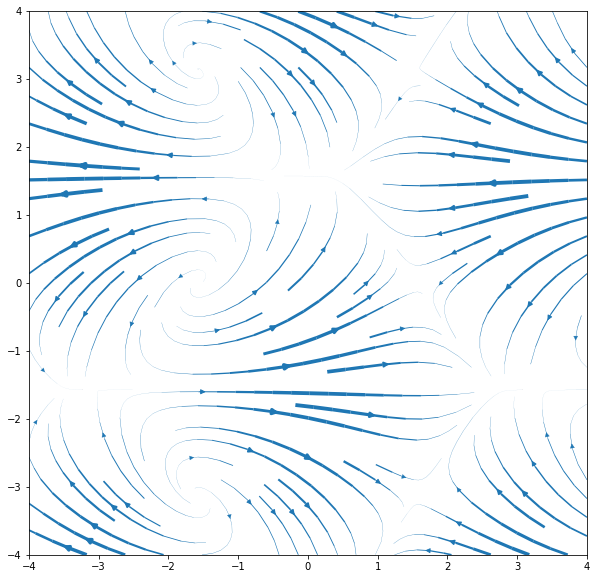

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.streamplot(mx,my,u,v,linewidth=u**2+v**2)